In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from joblib import dump

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [2]:
df = pd.read_csv('hepatitis.csv')
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


In [3]:
df.dtypes

class               int64
age                 int64
sex                 int64
steroid             int64
antivirals          int64
fatigue             int64
malaise             int64
anorexia            int64
liver_big           int64
liver_firm          int64
spleen_palable      int64
spiders             int64
ascites             int64
varices             int64
bilirubin         float64
alk_phosphate       int64
sgot                int64
albumin           float64
protime             int64
histology           int64
dtype: object

In [4]:
df['class'].unique()

array([2, 1], dtype=int64)

In [5]:
df['class'].replace((1,2),(0,1),inplace=True)
df['class'] = df['class'].astype('bool')

In [6]:
df['class'].dtype

dtype('bool')

In [7]:
df.describe()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,40.816901,1.105634,1.514085,1.838028,1.359155,1.619718,1.795775,1.823944,1.584507,1.809859,1.669014,1.880282,1.880282,1.382958,105.647887,83.507042,3.830493,61.704225,1.443662
std,12.189182,0.308456,0.501571,0.369729,0.481451,0.487174,0.404561,0.382216,0.494551,0.393801,0.472234,0.325781,0.325781,1.166526,47.375099,82.417700,0.618103,17.696732,0.498575
min,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.000000
25%,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,78.500000,32.250000,3.500000,56.250000,1.000000
50%,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,100.000000,58.000000,3.900000,61.000000,1.000000
75%,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.480000,119.750000,99.500000,4.200000,66.000000,2.000000
max,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [8]:
df['age'] = np.where((df['age']<=10),'Children',
                    np.where((df['age']>10) & (df['age']<=20), 'Teenagers',
                    np.where((df['age']>20) & (df['age']<=30), 'Adults',
                    np.where((df['age']>30) & (df['age']<=40), 'Middle-Aged', 'Old'))))

df['age'] = pd.Categorical(df.age, ['Children', 'Teenagers', 'Adults', 'Middle-Aged', 'Old'], ordered=True)

In [9]:
df['age'].unique()

['Adults', 'Old', 'Middle-Aged', 'Teenagers', 'Children']
Categories (5, object): ['Children' < 'Teenagers' < 'Adults' < 'Middle-Aged' < 'Old']

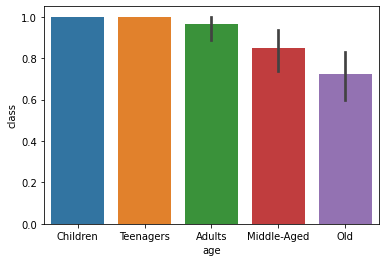

In [10]:
sns.barplot(x='age', y='class', data=df)
plt.show()

In [11]:
df['sex'].unique()

array([2, 1], dtype=int64)

In [12]:
df['sex'].replace((1,2),('Male','Female'), inplace=True)
df['sex'] = pd.Categorical(df.sex, ['Male', 'Female'], ordered=False)
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,True,Adults,Female,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,True,Old,Male,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,True,Old,Male,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,True,Middle-Aged,Male,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,True,Middle-Aged,Male,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


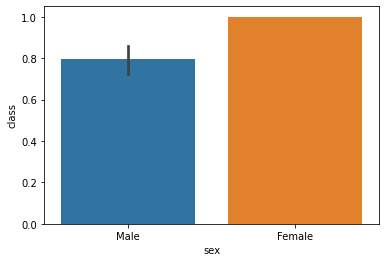

In [13]:
sns.barplot(x='sex', y='class', data=df)
plt.show()

In [14]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [15]:
sep = pd.get_dummies(df)
sep.columns

Index(['class', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'age_Children', 'age_Teenagers', 'age_Adults',
       'age_Middle-Aged', 'age_Old', 'sex_Male', 'sex_Female'],
      dtype='object')

In [16]:
X=sep.iloc[:,1:]
y=sep['class']
print(X.shape, y.shape)

(142, 24) (142,)


In [17]:
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
xtrain, xtest, ytrain, ytest = train_test_split(scaledX, y, test_size=.2, random_state=1234)

In [18]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
lr_pred = lr.predict(xtest)
print(accuracy_score(ytest,lr_pred)*100)

75.86206896551724


In [19]:
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)
knn_pred = knn.predict(xtest)
print(accuracy_score(ytest,knn_pred)*100)

89.65517241379311


In [20]:
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
rf_pred = rf.predict(xtest)
print(accuracy_score(ytest,rf_pred)*100)

89.65517241379311


In [21]:
dt=DecisionTreeClassifier(max_depth=15)
dt.fit(xtrain,ytrain)
dt_pred = dt.predict(xtest)
print(accuracy_score(ytest,dt_pred)*100)

68.96551724137932


In [22]:
svc = SVC(gamma='auto',kernel='poly',degree=3)
svc.fit(xtrain,ytrain)
svc_pred = svc.predict(xtest)
print(accuracy_score(ytest, svc_pred)*100)

93.10344827586206


In [23]:
cm_lr = confusion_matrix(ytest, lr_pred)
cm_knn = confusion_matrix(ytest, knn_pred)
cm_rf = confusion_matrix(ytest, rf_pred)
cm_dt = confusion_matrix(ytest, dt_pred)
cm_svc = confusion_matrix(ytest, svc_pred)

In [24]:
print(f'{cm_lr} \n {cm_knn} \n {cm_rf} \n {cm_dt} \n {cm_svc}')

[[ 1  4]
 [ 3 21]] 
 [[ 3  2]
 [ 1 23]] 
 [[ 3  2]
 [ 1 23]] 
 [[ 3  2]
 [ 7 17]] 
 [[ 3  2]
 [ 0 24]]
